In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
#from tensorflow.keras.layers import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras import models, layers, optimizers,utils
import joblib
import time
from sklearn.metrics import accuracy_score
import pandas as pd

In [ ]:
DATADIR = '/content/drive/MyDrive/flowers'

In [ ]:
IMG_SIZE = 180


In [ ]:
CATEGORIES = [ 'daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

/content/drive/MyDrive/flowers/rose
(333, 500, 3)


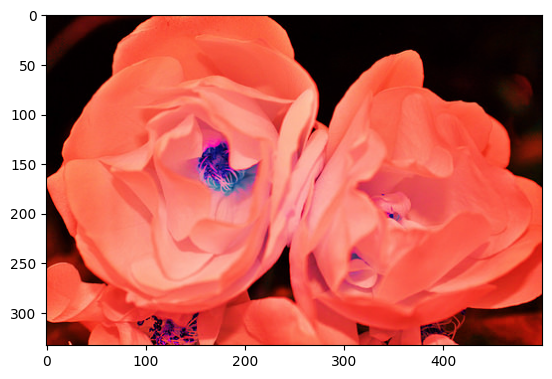

In [ ]:
for category in CATEGORIES [2:]:
    path = os.path.join(DATADIR, category)
    print(path)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img))
      print (img_array.shape)
      plt.imshow(img_array)
      plt.show()
      break
    break

In [ ]:
data = []
def create_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)
    for img in tqdm(os.listdir(path)):
      try:
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
        data.append([new_array, class_num])
      except Exception as e:
        pass

In [ ]:
create_data()


100%|██████████| 984/984 [00:19<00:00, 50.58it/s] 


In [ ]:
data = np.array(data)

<ipython-input-9-751e83d16d8a>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(data)


In [ ]:
data.shape

(4323, 2)

In [ ]:
X = []
y = []
for features, label in tqdm(data):
   X.append(features)
   y.append(label)

100%|██████████| 4323/4323 [00:00<00:00, 273413.70it/s]


In [ ]:
np.shape(X)

(4323, 180, 180, 3)

In [ ]:
X= np.array(X)
Y= np.array(y)

In [ ]:
X.shape

(4323, 180, 180, 3)

In [ ]:
Y.shape

(4323,)

In [ ]:
type(X), type(Y)

(numpy.ndarray, numpy.ndarray)

In [ ]:
X=X.reshape(-1, 97200)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state= 42)

In [ ]:
X_train.shape

(3026, 97200)

In [ ]:
#build a simple ANN architecture()
CNNmodel = Sequential([
    Dense(128,activation='relu', input_shape=(97200,)),
    Dense(64,activation='relu'),
    Dense(28,activation='relu'),
    Dense(16,activation='relu'),
    Dense(5,activation='softmax')
])

In [ ]:
CNNmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
S=time.time()
CNNmodel.fit (X_train, Y_train, epochs=5, batch_size=128, validation_data= (X_test, Y_test))
E=time.time()

Epoch 1/5
24/24 [==============================] - 9s 48ms/step - loss: 1397.5737 - accuracy: 0.2409 - val_loss: 297.4002 - val_accuracy: 0.2506
Epoch 2/5
24/24 [==============================] - 1s 26ms/step - loss: 267.8177 - accuracy: 0.2578 - val_loss: 170.4182 - val_accuracy: 0.2660
Epoch 3/5
24/24 [==============================] - 1s 25ms/step - loss: 169.0313 - accuracy: 0.3034 - val_loss: 117.6460 - val_accuracy: 0.3177
Epoch 4/5
24/24 [==============================] - 0s 21ms/step - loss: 144.0014 - accuracy: 0.2872 - val_loss: 137.0925 - val_accuracy: 0.3007
Epoch 5/5
24/24 [==============================] - 0s 20ms/step - loss: 131.5667 - accuracy: 0.3060 - val_loss: 105.6113 - val_accuracy: 0.2621


In [ ]:
#CNN Model
model =Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5),padding ='Same' , activation = 'relu',input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=65, kernel_size=(3,3), padding ='Same' , activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=95, kernel_size=(3,3),padding ='Same' , activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=95, kernel_size=(3,3),padding ='Same' , activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
X_train.shape

(3026, 97200)

In [ ]:
S=time.time()
model.fit (X_train, Y_train, epochs=10, batch_size=128, validation_data= (X_test, Y_test))
E=time.time()

Epoch 1/10


ValueError: ignored